/data/mlalande/miniconda3/envs/phd_v2/lib/python3.8/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.

Problem with the version of matplotlib 3.3

In [1]:
import proplot as plot
import xarray as xr

In [2]:
da = xr.tutorial.open_dataset('air_temperature').air - 273.15
clim = da.groupby(da['time.season']).mean('time')

/data/mlalande/miniconda3/envs/phd_v2/lib/python3.8/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)


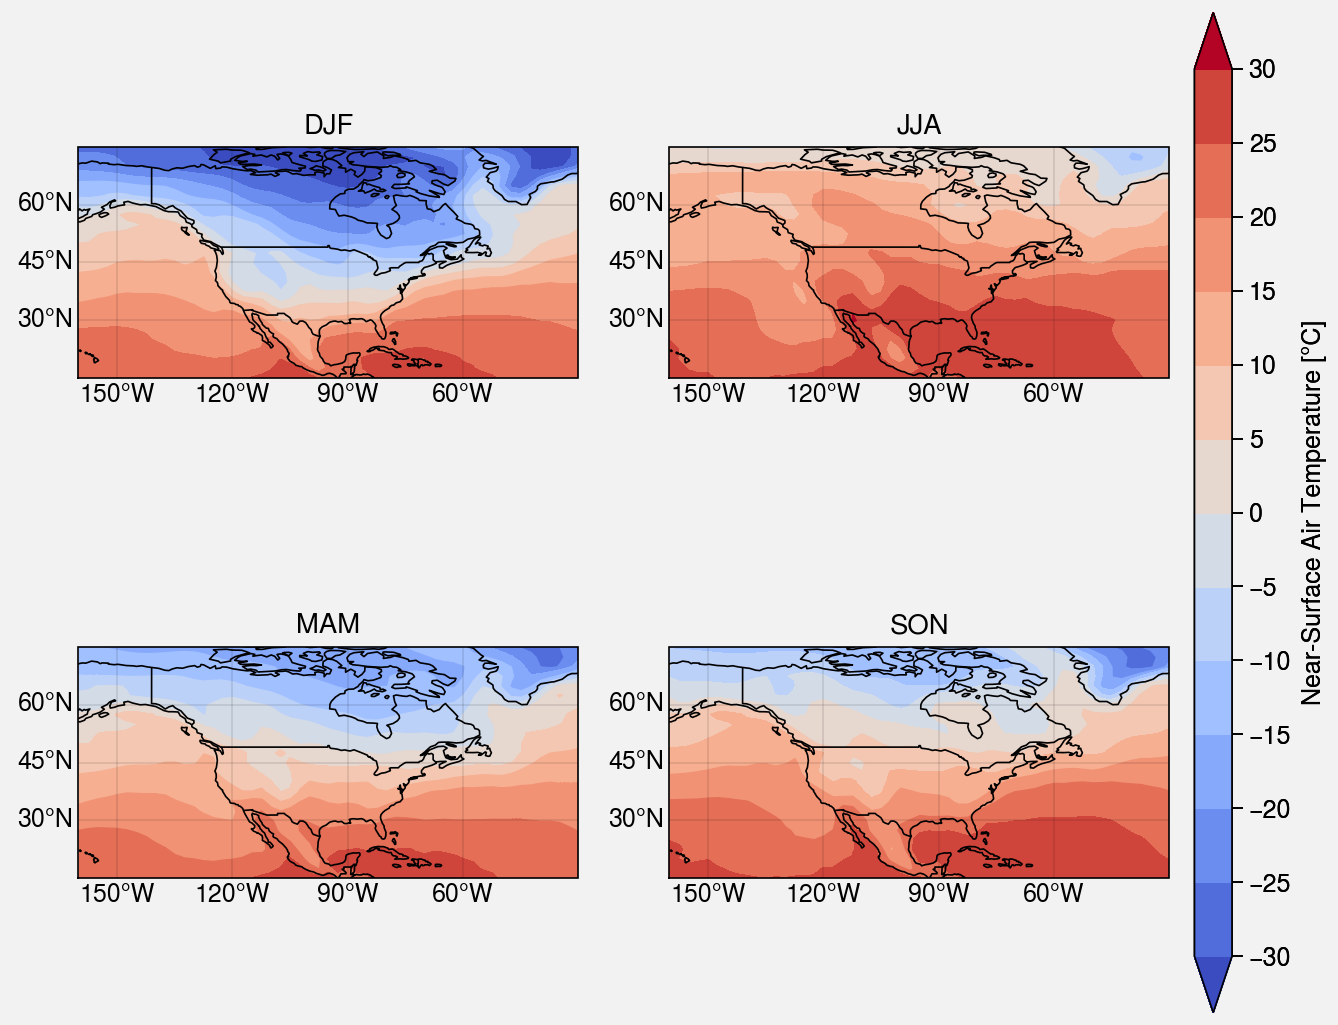

In [5]:
f, axs = plot.subplots(proj='cyl', ncols=2, nrows=2)

for i, ax in enumerate(axs):
    m = ax.contourf(clim.isel(season=i), levels=plot.arange(-30,30,5), extend='both', cmap='CoolWarm')
    
    ax.format(
        labels = True, coast = True, borders = True,
        lonlines=30, latlines=15, 
        latlim=(clim.lat.min().values, clim.lat.max().values), 
        lonlim=(clim.lon.min().values, clim.lon.max().values),
        title=clim.isel(season=i).season.values
    )
    
f.colorbar(m, label='Near-Surface Air Temperature [°C]')
f.save('img/extend_phd_v2.jpg')